In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [90]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columns =  [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigree", "Age", "Outcome"
]
df = pd.read_csv(url, names=columns)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
df.mean()

,0
Pregnancies,3.845052
Glucose,120.894531
BloodPressure,69.105469
SkinThickness,20.536458
Insulin,79.799479
BMI,31.992578
DiabetesPedigree,0.471876
Age,33.240885
Outcome,0.348958


In [92]:
# Glucose category
df["GlucoseStatus"] = pd.cut(
    df["Glucose"],
    bins=[0, 99, 125, 500],
    labels=["Normal", "Prediabetic", "Diabetic"]
)

# Blood pressure category
df["BP_Status"] = pd.cut(
    df["BloodPressure"],
    bins=[0, 60, 80, 200],
    labels=["Low", "Normal", "High"]
)

# BMI category
df["BMI_Category"] = pd.cut(
    df["BMI"],
    bins=[0, 18.5, 25, 30, 100],
    labels=["Underweight", "Normal", "Overweight", "Obese"]
)

# Age groups
df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=[0, 30, 50, 120],
    labels=["Young", "Middle", "Old"]
)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,GlucoseStatus,BP_Status,BMI_Category,AgeGroup
0,6,148,72,35,0,33.6,0.627,50,1,Diabetic,Normal,Obese,Middle
1,1,85,66,29,0,26.6,0.351,31,0,Normal,Normal,Overweight,Middle
2,8,183,64,0,0,23.3,0.672,32,1,Diabetic,Normal,Normal,Middle
3,1,89,66,23,94,28.1,0.167,21,0,Normal,Normal,Overweight,Young
4,0,137,40,35,168,43.1,2.288,33,1,Diabetic,Low,Obese,Middle


In [93]:
bmi_map = {
    "Underweight": 0,
    "Normal": 0,
    "Overweight": 1,
    "Obese": 2
}

df["BMI_Risk"] = df["BMI_Category"].map(bmi_map)
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,GlucoseStatus,BP_Status,BMI_Category,AgeGroup,BMI_Risk
0,6,148,72,35,0,33.6,0.627,50,1,Diabetic,Normal,Obese,Middle,2.0
1,1,85,66,29,0,26.6,0.351,31,0,Normal,Normal,Overweight,Middle,1.0
2,8,183,64,0,0,23.3,0.672,32,1,Diabetic,Normal,Normal,Middle,0.0
3,1,89,66,23,94,28.1,0.167,21,0,Normal,Normal,Overweight,Young,1.0
4,0,137,40,35,168,43.1,2.288,33,1,Diabetic,Low,Obese,Middle,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,Prediabetic,Normal,Obese,Old,2.0
764,2,122,70,27,0,36.8,0.340,27,0,Prediabetic,Normal,Obese,Young,2.0
765,5,121,72,23,112,26.2,0.245,30,0,Prediabetic,Normal,Overweight,Young,1.0
766,1,126,60,0,0,30.1,0.349,47,1,Diabetic,Low,Obese,Middle,2.0


In [94]:
df["SkinThickness"].replace(0, np.nan, inplace=True)
df["SkinThickness"].fillna(df["SkinThickness"].median(), inplace=True)


/tmp/ipython-input-3346627824.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["SkinThickness"].replace(0, np.nan, inplace=True)


In [47]:
df["SkinThickness"].unique()


array([35., 29., 23., 32., 45., 19., 47., 38., 30., 41., 33., 26., 15.,
       36., 11., 31., 37., 42., 25., 18., 24., 39., 27., 21., 34., 10.,
       60., 13., 20., 22., 28., 54., 40., 51., 56., 14., 17., 50., 44.,
       12., 46., 16.,  7., 52., 43., 48.,  8., 49., 63., 99.])

In [48]:
df["SkinThickness"].isnull().sum()

np.int64(0)

In [49]:
df["SkinThickness"].describe()

,SkinThickness
count,768.000000
mean,29.108073
std,8.791221
min,7.000000
25%,25.000000
50%,29.000000
75%,32.000000
max,99.000000


In [95]:
df = df[df["SkinThickness"] <= 60]


In [96]:
df["SkinFatlevel"]=pd.cut(
    df["SkinThickness"],
    bins=[0,10,20,60],
    labels=["Low","Moderate","High"]

)

/tmp/ipython-input-539904770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SkinFatlevel"]=pd.cut(


In [52]:
df["SkinFatlevel"].value_counts()

,count
SkinFatlevel,
High,642
Moderate,115
Low,9


In [97]:
df.groupby("SkinFatlevel")["Outcome"].mean()

/tmp/ipython-input-2099464353.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("SkinFatlevel")["Outcome"].mean()


,Outcome
SkinFatlevel,
Low,0.111111
Moderate,0.139130
High,0.387850


In [98]:
skinfat = {
    "Low":0,
    "Moderate": 1,
    "High":2
}


df["SkinFatLevel_Risk"] = df["SkinFatlevel"].map(skinfat)
df

/tmp/ipython-input-4161346126.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SkinFatLevel_Risk"] = df["SkinFatlevel"].map(skinfat)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,GlucoseStatus,BP_Status,BMI_Category,AgeGroup,BMI_Risk,SkinFatlevel,SkinFatLevel_Risk
0,6,148,72,35.0,0,33.6,0.627,50,1,Diabetic,Normal,Obese,Middle,2.0,High,2
1,1,85,66,29.0,0,26.6,0.351,31,0,Normal,Normal,Overweight,Middle,1.0,High,2
2,8,183,64,29.0,0,23.3,0.672,32,1,Diabetic,Normal,Normal,Middle,0.0,High,2
3,1,89,66,23.0,94,28.1,0.167,21,0,Normal,Normal,Overweight,Young,1.0,High,2
4,0,137,40,35.0,168,43.1,2.288,33,1,Diabetic,Low,Obese,Middle,2.0,High,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180,32.9,0.171,63,0,Prediabetic,Normal,Obese,Old,2.0,High,2
764,2,122,70,27.0,0,36.8,0.340,27,0,Prediabetic,Normal,Obese,Young,2.0,High,2
765,5,121,72,23.0,112,26.2,0.245,30,0,Prediabetic,Normal,Overweight,Young,1.0,High,2
766,1,126,60,29.0,0,30.1,0.349,47,1,Diabetic,Low,Obese,Middle,2.0,High,2


In [99]:
df["GlucoseStatus"]=pd.cut(
    df["Glucose"],
    bins=[0,99,125,df["Glucose"].max()],
    labels=["Normal","Pre-diabetic","Diabetic"]
)

/tmp/ipython-input-2675822698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["GlucoseStatus"]=pd.cut(


In [56]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,GlucoseStatus,BP_Status,BMI_Category,AgeGroup,BMI_Risk,SkinFatlevel,SkinFatLevel_Risk
0,6,148,72,35.0,0,33.6,0.627,50,1,Diabetic,Normal,Obese,Middle,2.0,High,2
1,1,85,66,29.0,0,26.6,0.351,31,0,Normal,Normal,Overweight,Middle,1.0,High,2
2,8,183,64,29.0,0,23.3,0.672,32,1,Diabetic,Normal,Normal,Middle,0.0,High,2
3,1,89,66,23.0,94,28.1,0.167,21,0,Normal,Normal,Overweight,Young,1.0,High,2
4,0,137,40,35.0,168,43.1,2.288,33,1,Diabetic,Low,Obese,Middle,2.0,High,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180,32.9,0.171,63,0,Pre-diabetic,Normal,Obese,Old,2.0,High,2
764,2,122,70,27.0,0,36.8,0.340,27,0,Pre-diabetic,Normal,Obese,Young,2.0,High,2
765,5,121,72,23.0,112,26.2,0.245,30,0,Pre-diabetic,Normal,Overweight,Young,1.0,High,2
766,1,126,60,29.0,0,30.1,0.349,47,1,Diabetic,Low,Obese,Middle,2.0,High,2


In [100]:
import pandas as pd
df["InsulinStatus"]=pd.cut(
    df["Insulin"],
    bins=[-1,16,70,df["Insulin"].max()],
    labels=["Low","Normal","High"]
)

/tmp/ipython-input-1307124415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["InsulinStatus"]=pd.cut(


In [58]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,GlucoseStatus,BP_Status,BMI_Category,AgeGroup,BMI_Risk,SkinFatlevel,SkinFatLevel_Risk,InsulinStatus
0,6,148,72,35.0,0,33.6,0.627,50,1,Diabetic,Normal,Obese,Middle,2.0,High,2,Low
1,1,85,66,29.0,0,26.6,0.351,31,0,Normal,Normal,Overweight,Middle,1.0,High,2,Low
2,8,183,64,29.0,0,23.3,0.672,32,1,Diabetic,Normal,Normal,Middle,0.0,High,2,Low
3,1,89,66,23.0,94,28.1,0.167,21,0,Normal,Normal,Overweight,Young,1.0,High,2,High
4,0,137,40,35.0,168,43.1,2.288,33,1,Diabetic,Low,Obese,Middle,2.0,High,2,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180,32.9,0.171,63,0,Pre-diabetic,Normal,Obese,Old,2.0,High,2,High
764,2,122,70,27.0,0,36.8,0.340,27,0,Pre-diabetic,Normal,Obese,Young,2.0,High,2,Low
765,5,121,72,23.0,112,26.2,0.245,30,0,Pre-diabetic,Normal,Overweight,Young,1.0,High,2,High
766,1,126,60,29.0,0,30.1,0.349,47,1,Diabetic,Low,Obese,Middle,2.0,High,2,Low


In [101]:
import numpy as np

conditions = [
    # 1. Insulin Resistant
    (df["GlucoseStatus"] == "Diabetic") & (df["InsulinStatus"] == "High"),

    # 2. Beta-Cell Failure
    (df["GlucoseStatus"] == "Diabetic") & (df["InsulinStatus"] == "Low"),

    # 3. Early Insulin Resistance
    (df["GlucoseStatus"] == "Pre-diabetic") & (df["InsulinStatus"].isin(["High", "Normal"])),

    # 4. Hyperinsulinemia
    (df["GlucoseStatus"] == "Normal") & (df["InsulinStatus"] == "High"),

    # 5. Normal metabolism
    (df["GlucoseStatus"] == "Normal") & (df["InsulinStatus"] == "Normal")
]

choices = [
    "Insulin Resistant",
    "Beta-Cell Failure",
    "Early Insulin Resistance",
    "Hyperinsulinemia",
    "Normal"
]

df["MetabolicStatus"] = np.select(conditions, choices, default="Unknown")


/tmp/ipython-input-466688896.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MetabolicStatus"] = np.select(conditions, choices, default="Unknown")


In [60]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,GlucoseStatus,BP_Status,BMI_Category,AgeGroup,BMI_Risk,SkinFatlevel,SkinFatLevel_Risk,InsulinStatus,MetabolicStatus
0,6,148,72,35.0,0,33.6,0.627,50,1,Diabetic,Normal,Obese,Middle,2.0,High,2,Low,Beta-Cell Failure
1,1,85,66,29.0,0,26.6,0.351,31,0,Normal,Normal,Overweight,Middle,1.0,High,2,Low,Unknown
2,8,183,64,29.0,0,23.3,0.672,32,1,Diabetic,Normal,Normal,Middle,0.0,High,2,Low,Beta-Cell Failure
3,1,89,66,23.0,94,28.1,0.167,21,0,Normal,Normal,Overweight,Young,1.0,High,2,High,Hyperinsulinemia
4,0,137,40,35.0,168,43.1,2.288,33,1,Diabetic,Low,Obese,Middle,2.0,High,2,High,Insulin Resistant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180,32.9,0.171,63,0,Pre-diabetic,Normal,Obese,Old,2.0,High,2,High,Early Insulin Resistance
764,2,122,70,27.0,0,36.8,0.340,27,0,Pre-diabetic,Normal,Obese,Young,2.0,High,2,Low,Unknown
765,5,121,72,23.0,112,26.2,0.245,30,0,Pre-diabetic,Normal,Overweight,Young,1.0,High,2,High,Early Insulin Resistance
766,1,126,60,29.0,0,30.1,0.349,47,1,Diabetic,Low,Obese,Middle,2.0,High,2,Low,Beta-Cell Failure


/tmp/ipython-input-3535390148.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df, x='Pregnancies', y='MetabolicStatus', inner='box', palette='Dark2')


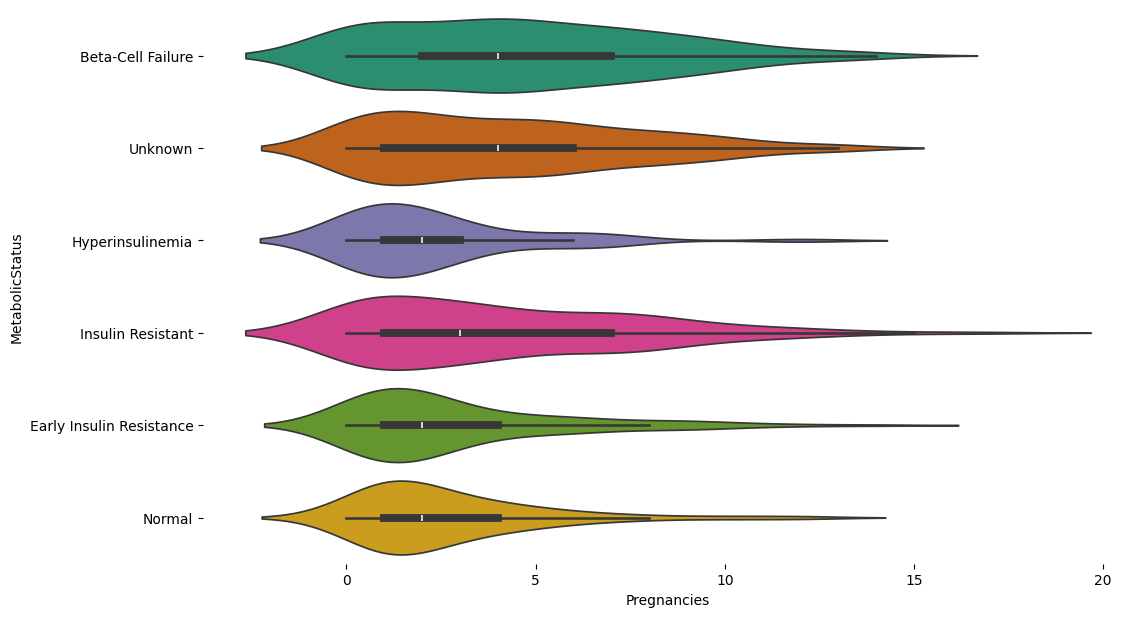

In [102]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['MetabolicStatus'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Pregnancies', y='MetabolicStatus', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [62]:
df["MetabolicStatus"].value_counts()


,count
MetabolicStatus,
Unknown,250
Insulin Resistant,153
Beta-Cell Failure,134
Early Insulin Resistance,129
Normal,53
Hyperinsulinemia,47


In [63]:
df.groupby("MetabolicStatus")["Outcome"].mean().sort_values(ascending=False)


,Outcome
MetabolicStatus,
Beta-Cell Failure,0.604478
Insulin Resistant,0.594771
Unknown,0.232000
Early Insulin Resistance,0.217054
Hyperinsulinemia,0.127660
Normal,0.037736


<Axes: xlabel='MetabolicStatus'>

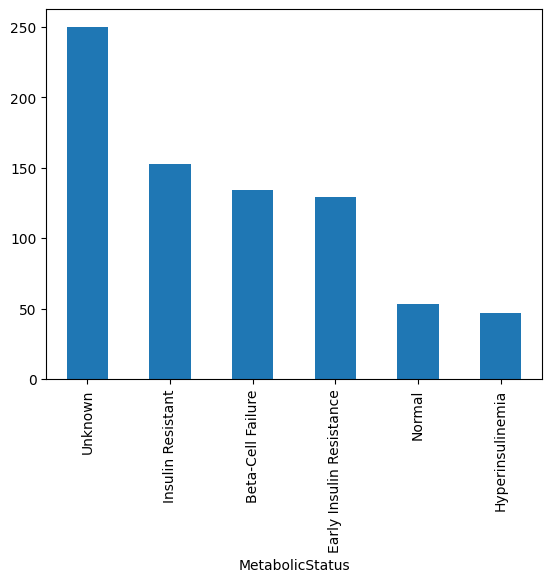

In [64]:
df["MetabolicStatus"].value_counts().plot(kind="bar")


In [103]:
df["HOMA_IR"] = (df["Glucose"]*df["Insulin"])/405

/tmp/ipython-input-463965556.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HOMA_IR"] = (df["Glucose"]*df["Insulin"])/405


In [104]:
df["HOMA_Class"] = pd.cut(
    df["HOMA_IR"],
    bins=[-1, 1, 2, 2.5, df["HOMA_IR"].max()],
    labels=["Very Sensitive", "Normal", "Early IR", "Severe IR"]
)


/tmp/ipython-input-3696500410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["HOMA_Class"] = pd.cut(


In [105]:
df["BP_Status"] = pd.cut(
    df["BloodPressure"],
    bins=[0, 60, 80, 120],
    labels=["Low", "Normal", "Elevated"]
)


/tmp/ipython-input-3422150696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BP_Status"] = pd.cut(


In [106]:
df["BMI_Status"] = pd.cut(
    df["BMI"],
    bins=[0, 18.5, 25, 30, 100],
    labels=["Underweight", "Healthy", "Overweight", "Obese"]
)



/tmp/ipython-input-3816174762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["BMI_Status"] = pd.cut(


In [107]:
df["Age_Risk"] = pd.cut(
    df["Age"],
    bins=[0, 25, 40, 60, 150],
    labels=["Young", "Adult", "Middle Age", "Senior"]
)



/tmp/ipython-input-3948392211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age_Risk"] = pd.cut(


In [108]:
df["MetabolicCluster"] = (
    df["GlucoseStatus"].astype(str) + "_" +
    df["InsulinStatus"].astype(str) + "_" +
    df["BMI_Status"].astype(str)
)


/tmp/ipython-input-3211624834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MetabolicCluster"] = (


<Axes: xlabel='MetabolicStatus'>

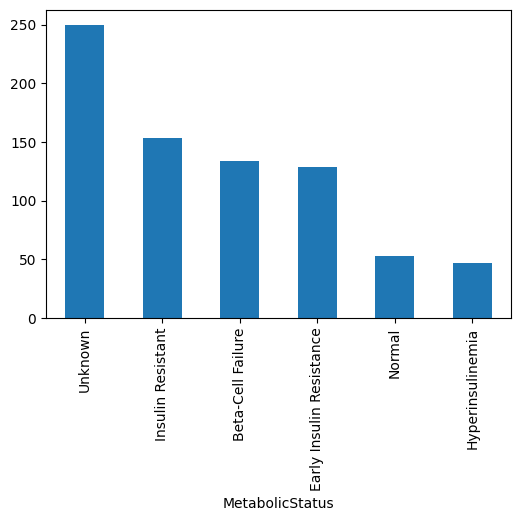

In [109]:
df["MetabolicStatus"].value_counts().plot(kind="bar", figsize=(6,4))


<Axes: xlabel='MetabolicStatus'>

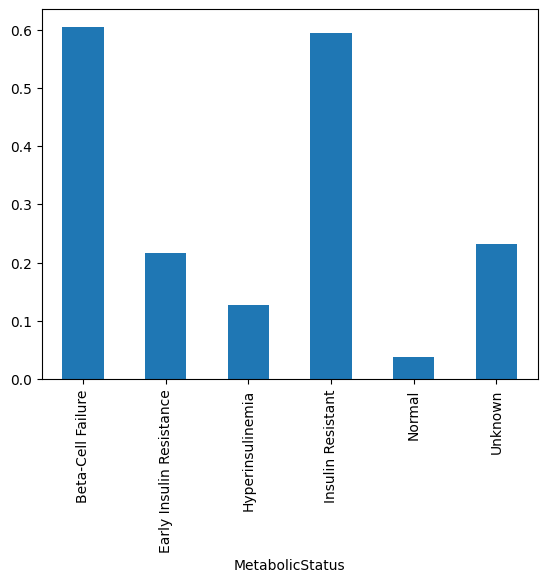

In [110]:
df.groupby("MetabolicStatus")["Outcome"].mean().plot(kind="bar")


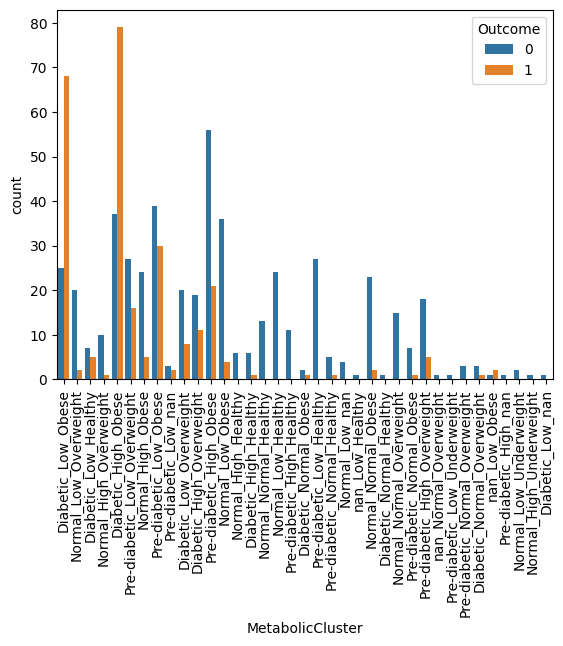

In [111]:
sns.countplot(data=df, x="MetabolicCluster", hue="Outcome")
plt.xticks(rotation=90)
plt.show()


<Axes: xlabel='Outcome', ylabel='HOMA_IR'>

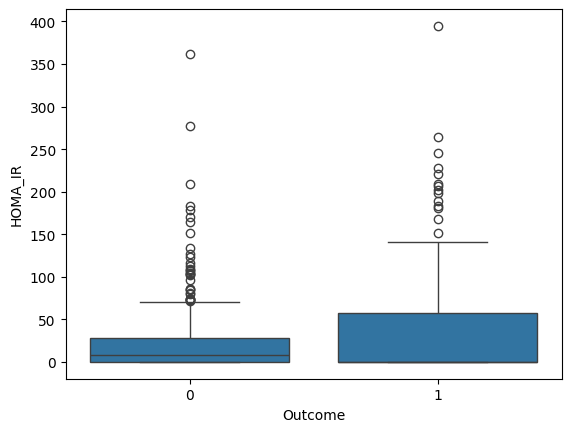

In [112]:
sns.boxplot(data=df, x="Outcome", y="HOMA_IR")


In [113]:
|columns = ["Glucose", "Insulin", "BMI", "Age", "HOMA_IR"]

for col in columns:
    df[col].hist(bins=30)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


SyntaxError: invalid syntax (ipython-input-1021895850.py, line 1)

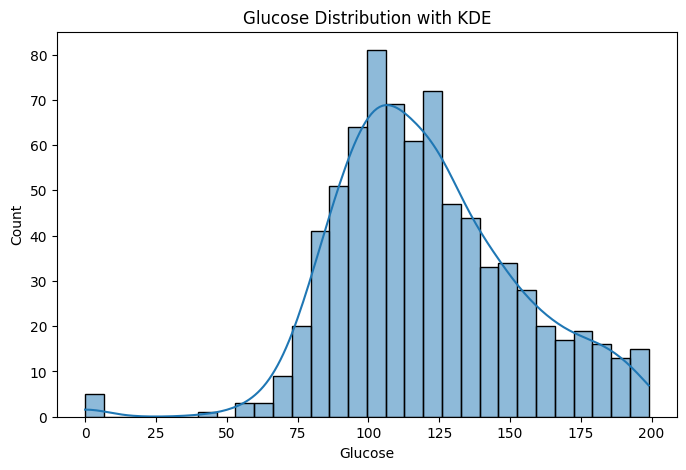

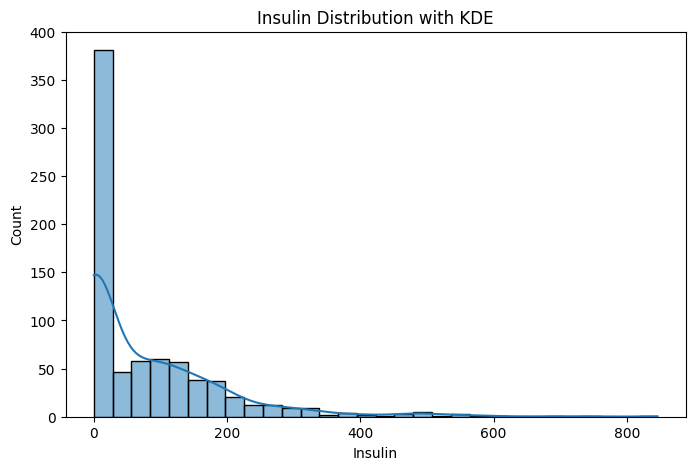

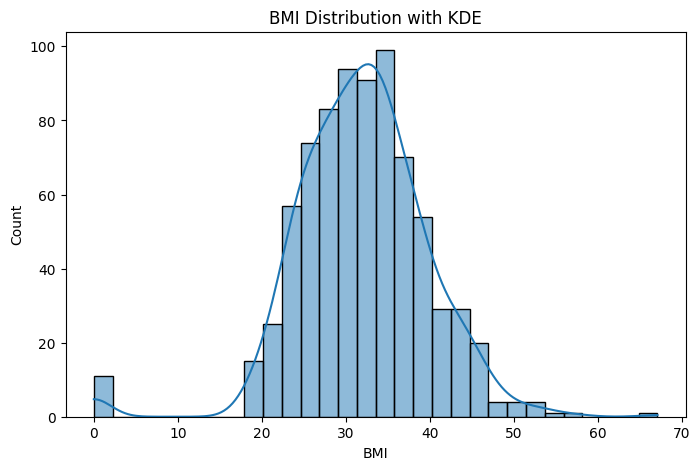

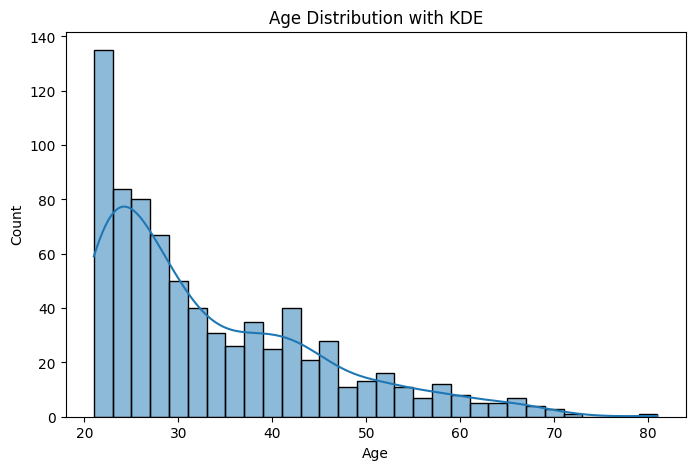

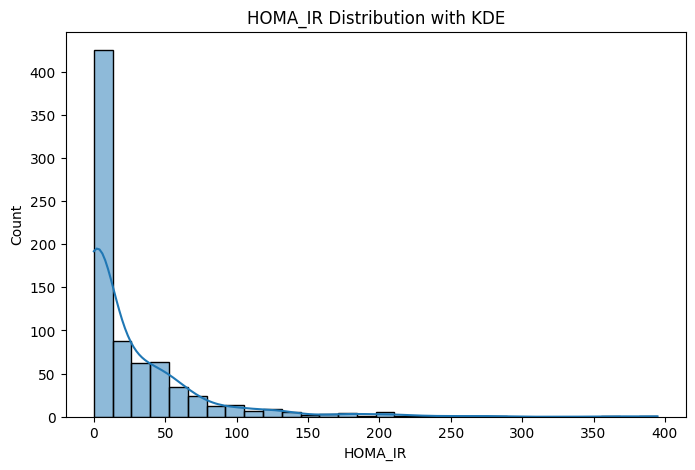

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ["Glucose", "Insulin", "BMI", "Age", "HOMA_IR"]

for col in columns:
    plt.figure(figsize=(8,5))

    # Histogram + KDE
    sns.histplot(df[col], kde=True, bins=30)

    plt.title(f"{col} Distribution with KDE")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


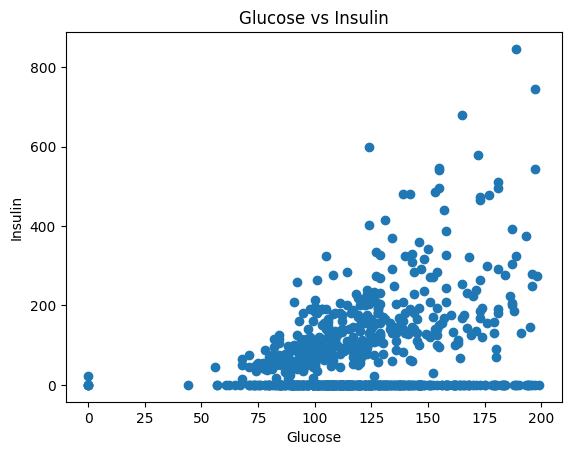

In [115]:
import matplotlib.pyplot as plt
plt.scatter(df["Glucose"],df["Insulin"])
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.title("Glucose vs Insulin")
plt.show()

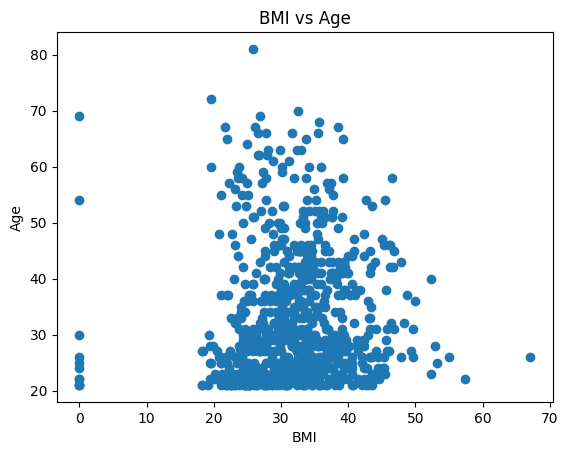

In [116]:
plt.scatter(df["BMI"],df["Age"])
plt.xlabel("BMI")
plt.ylabel("Age")
plt.title("BMI vs Age")
plt.show()

In [79]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,GlucoseStatus,...,BMI_Risk,SkinFatlevel,SkinFatLevel_Risk,InsulinStatus,MetabolicStatus,HOMA_IR,HOMA_Class,BMI_Status,Age_Risk,MetabolicCluster
0,6,148,72,35.0,0,33.6,0.627,50,1,Diabetic,...,2.0,High,2,Low,Beta-Cell Failure,0.000000,Very Sensitive,Obese,Middle Age,Diabetic_Low_Obese
1,1,85,66,29.0,0,26.6,0.351,31,0,Normal,...,1.0,High,2,Low,Unknown,0.000000,Very Sensitive,Overweight,Adult,Normal_Low_Overweight
2,8,183,64,29.0,0,23.3,0.672,32,1,Diabetic,...,0.0,High,2,Low,Beta-Cell Failure,0.000000,Very Sensitive,Healthy,Adult,Diabetic_Low_Healthy
3,1,89,66,23.0,94,28.1,0.167,21,0,Normal,...,1.0,High,2,High,Hyperinsulinemia,20.656790,Severe IR,Overweight,Young,Normal_High_Overweight
4,0,137,40,35.0,168,43.1,2.288,33,1,Diabetic,...,2.0,High,2,High,Insulin Resistant,56.829630,Severe IR,Obese,Adult,Diabetic_High_Obese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180,32.9,0.171,63,0,Pre-diabetic,...,2.0,High,2,High,Early Insulin Resistance,44.888889,Severe IR,Obese,Senior,Pre-diabetic_High_Obese
764,2,122,70,27.0,0,36.8,0.340,27,0,Pre-diabetic,...,2.0,High,2,Low,Unknown,0.000000,Very Sensitive,Obese,Adult,Pre-diabetic_Low_Obese
765,5,121,72,23.0,112,26.2,0.245,30,0,Pre-diabetic,...,1.0,High,2,High,Early Insulin Resistance,33.461728,Severe IR,Overweight,Adult,Pre-diabetic_High_Overweight
766,1,126,60,29.0,0,30.1,0.349,47,1,Diabetic,...,2.0,High,2,Low,Beta-Cell Failure,0.000000,Very Sensitive,Obese,Middle Age,Diabetic_Low_Obese


In [117]:
plt.scatter(df["HORA_IR",df["Outcome"]])

InvalidIndexError: ('HORA_IR', 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 766, dtype: int64)

In [118]:
status_map = {
    "Normal": 0,
    "Hyperinsulinemia": 1,
    "Early Insulin Resistance": 2,
    "Insulin Resistant": 3,
    "Beta-Cell Failure": 4,
    "Unknown": 5
}

df["MetabolicStatus_Code"] = df["MetabolicStatus"].map(status_map)


/tmp/ipython-input-3082105867.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["MetabolicStatus_Code"] = df["MetabolicStatus"].map(status_map)


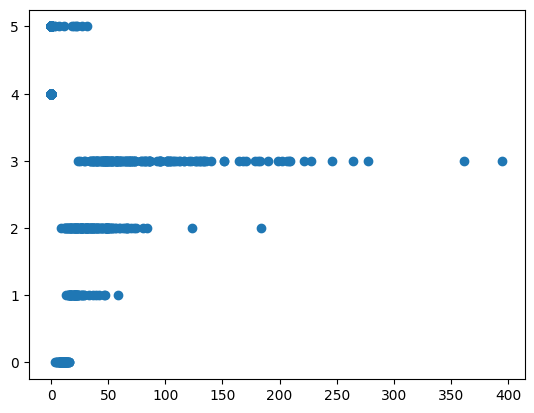

In [119]:
plt.scatter(df["HOMA_IR"], df["MetabolicStatus_Code"])


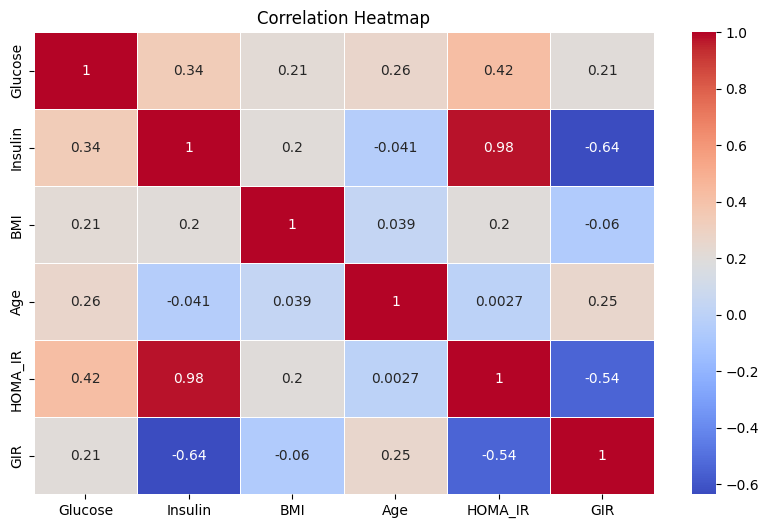

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df[["Glucose","Insulin","BMI","Age","HOMA_IR","GIR"]].corr(),
            annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [125]:
df["GIR"] = df["Glucose"]/(df["Insulin"]+1)

/tmp/ipython-input-1565875269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["GIR"] = df["Glucose"]/(df["Insulin"]+1)


In [132]:
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigree,Age,Outcome,GlucoseStatus,...,SkinFatLevel_Risk,InsulinStatus,MetabolicStatus,HOMA_IR,HOMA_Class,BMI_Status,Age_Risk,MetabolicCluster,MetabolicStatus_Code,GIR
0,6,148,72,35.0,0,33.6,0.627,50,1,Diabetic,...,2,Low,Beta-Cell Failure,0.000000,Very Sensitive,Obese,Middle Age,Diabetic_Low_Obese,4,148.000000
1,1,85,66,29.0,0,26.6,0.351,31,0,Normal,...,2,Low,Unknown,0.000000,Very Sensitive,Overweight,Adult,Normal_Low_Overweight,5,85.000000
2,8,183,64,29.0,0,23.3,0.672,32,1,Diabetic,...,2,Low,Beta-Cell Failure,0.000000,Very Sensitive,Healthy,Adult,Diabetic_Low_Healthy,4,183.000000
3,1,89,66,23.0,94,28.1,0.167,21,0,Normal,...,2,High,Hyperinsulinemia,20.656790,Severe IR,Overweight,Young,Normal_High_Overweight,1,0.936842
4,0,137,40,35.0,168,43.1,2.288,33,1,Diabetic,...,2,High,Insulin Resistant,56.829630,Severe IR,Obese,Adult,Diabetic_High_Obese,3,0.810651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.0,180,32.9,0.171,63,0,Pre-diabetic,...,2,High,Early Insulin Resistance,44.888889,Severe IR,Obese,Senior,Pre-diabetic_High_Obese,2,0.558011
764,2,122,70,27.0,0,36.8,0.340,27,0,Pre-diabetic,...,2,Low,Unknown,0.000000,Very Sensitive,Obese,Adult,Pre-diabetic_Low_Obese,5,122.000000
765,5,121,72,23.0,112,26.2,0.245,30,0,Pre-diabetic,...,2,High,Early Insulin Resistance,33.461728,Severe IR,Overweight,Adult,Pre-diabetic_High_Overweight,2,1.070796
766,1,126,60,29.0,0,30.1,0.349,47,1,Diabetic,...,2,Low,Beta-Cell Failure,0.000000,Very Sensitive,Obese,Middle Age,Diabetic_Low_Obese,4,126.000000


In [127]:
print(df["GIR"].describe())


count    766.000000
mean      58.611999
std       63.226190
min        0.000000
25%        0.944188
50%        2.423831
75%      114.000000
max      199.000000
Name: GIR, dtype: float64


In [134]:
conditions = [
    df["GIR"] < 0.5,
    (df["GIR"] >= 0.5) & (df["GIR"] < 1.5),
    df["GIR"] >= 1.5
]

choices = ["High IR", "Normal", "Beta-cell Dysfunction"]

df["GIR_Category"] = np.select(conditions, choices, default="Unknown")


/tmp/ipython-input-2359393072.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["GIR_Category"] = np.select(conditions, choices, default="Unknown")


In [135]:
df["GIR_Category"].value_counts()


,count
GIR_Category,
Beta-cell Dysfunction,443
Normal,276
High IR,47


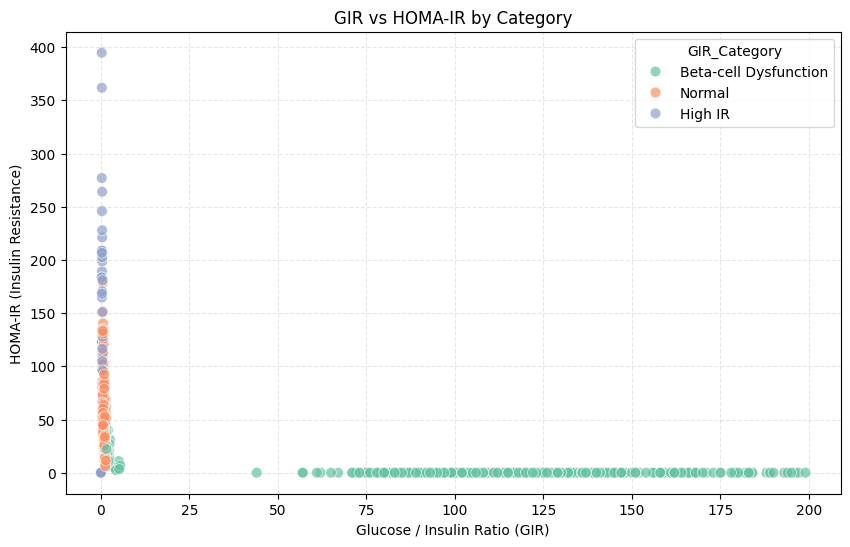

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="GIR",
    y="HOMA_IR",
    hue="GIR_Category",
    palette="Set2",
    alpha=0.7,
    s=60
)

plt.xlabel("Glucose / Insulin Ratio (GIR)")
plt.ylabel("HOMA-IR (Insulin Resistance)")
plt.title("GIR vs HOMA-IR by Category")
plt.grid(True, linestyle="--", alpha=0.3)
plt.show()


In [137]:
X = df[["Glucose", "Insulin", "BMI", "Age", "HOMA_IR", "GIR"]]
y = df["MetabolicStatus"]


In [138]:
from sklearn.model_selection import train_test_split

X = df[["Glucose", "Insulin", "BMI", "Age", "HOMA_IR", "GIR"]]
y = df["MetabolicStatus"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [139]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

# To see class mappings
list(le.classes_)


['Beta-Cell Failure',
 'Early Insulin Resistance',
 'Hyperinsulinemia',
 'Insulin Resistant',
 'Normal',
 'Unknown']

In [140]:
from sklearn.preprocessing import LabelEncoder

# Create encoder object
le = LabelEncoder()

# Fit on training data only (important!)
y_train_enc = le.fit_transform(y_train)

# Transform test data
y_test_enc = le.transform(y_test)

# See mapping
print("Class Mapping:", list(le.classes_))


Class Mapping: ['Beta-Cell Failure', 'Early Insulin Resistance', 'Hyperinsulinemia', 'Insulin Resistant', 'Normal', 'Unknown']


In [141]:
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

# Fit on training features only
X_train_scaled = scaler.fit_transform(X_train)

# Transform test features
X_test_scaled = scaler.transform(X_test)


In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create model
model = LogisticRegression(max_iter=500)

# Train on scaled data
model.fit(X_train_scaled, y_train_enc)

# Predict
y_pred = model.predict(X_test_scaled)

# Accuracy
acc = accuracy_score(y_test_enc, y_pred)
print("Accuracy:", acc)

# Full report
print(classification_report(y_test_enc, y_pred, target_names=le.classes_))


Accuracy: 0.8766233766233766
                          precision    recall  f1-score   support

       Beta-Cell Failure       1.00      0.96      0.98        27
Early Insulin Resistance       0.76      0.85      0.80        26
        Hyperinsulinemia       1.00      0.44      0.62         9
       Insulin Resistant       0.85      0.94      0.89        31
                  Normal       0.67      0.91      0.77        11
                 Unknown       0.96      0.88      0.92        50

                accuracy                           0.88       154
               macro avg       0.87      0.83      0.83       154
            weighted avg       0.89      0.88      0.88       154



In [148]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict on test set
y_pred = log_reg.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=log_reg.classes_)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


NameError: name 'log_reg' is not defined

In [149]:
from sklearn.model_selection import train_test_split

X = df[["Glucose", "Insulin", "BMI", "Age", "HOMA_IR", "GIR"]]   # example features
y = df["MetabolicStatus"]

X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [150]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, Y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

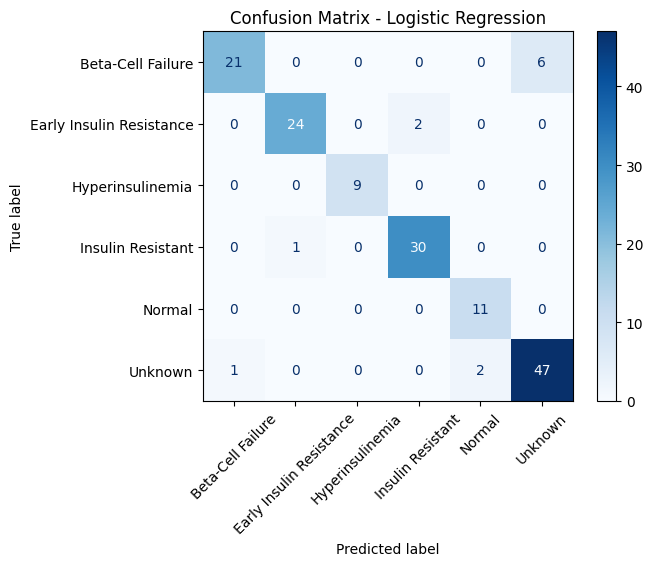

In [151]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = log_reg.predict(X_test)

cm = confusion_matrix(Y_test, y_pred, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)

disp.plot(cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [153]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

# -----------------------
# 1. Select features
# -----------------------
features = ["Glucose", "Insulin", "BMI", "Age", "HOMA_IR", "GIR"]
X = df[features]
y = df["MetabolicStatus"]

# -----------------------
# 2. Train-test split
# -----------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------
# 3. Build pipeline
# -----------------------
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000))
])

# -----------------------
# 4. Fit pipeline
# -----------------------
pipeline.fit(X_train, y_train)

# -----------------------
# 5. Predict
# -----------------------
y_pred = pipeline.predict(X_test)

# -----------------------
# 6. Metrics
# -----------------------
print(classification_report(y_test, y_pred))


                          precision    recall  f1-score   support

       Beta-Cell Failure       1.00      0.96      0.98        27
Early Insulin Resistance       0.76      0.85      0.80        26
        Hyperinsulinemia       1.00      0.44      0.62         9
       Insulin Resistant       0.85      0.94      0.89        31
                  Normal       0.67      0.91      0.77        11
                 Unknown       0.96      0.88      0.92        50

                accuracy                           0.88       154
               macro avg       0.87      0.83      0.83       154
            weighted avg       0.89      0.88      0.88       154



In [154]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [155]:
import numpy as np
import pandas as pd

importances = rf.feature_importances_
feat_names = X.columns

importance_df = pd.DataFrame({
    "Feature": feat_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

importance_df


,Feature,Importance
0,Glucose,0.353597
4,HOMA_IR,0.221647
5,GIR,0.203964
1,Insulin,0.193004
3,Age,0.016116
2,BMI,0.011673


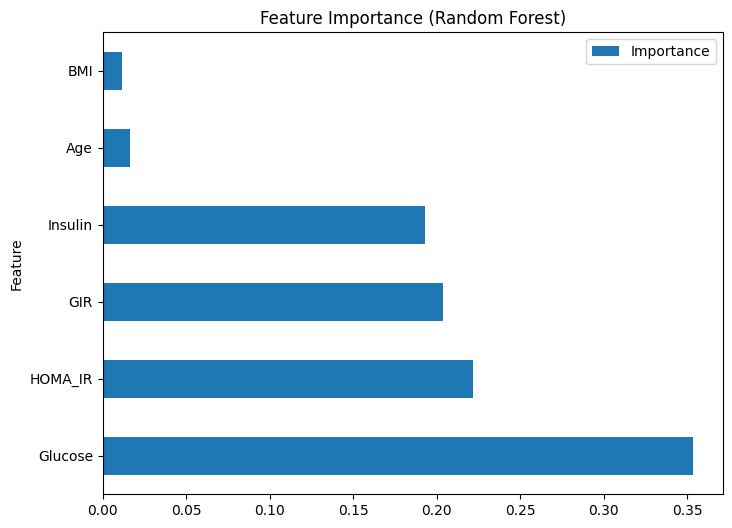

In [156]:
importance_df.plot(kind="barh", x="Feature", y="Importance", figsize=(8,6))
plt.title("Feature Importance (Random Forest)")
plt.show()


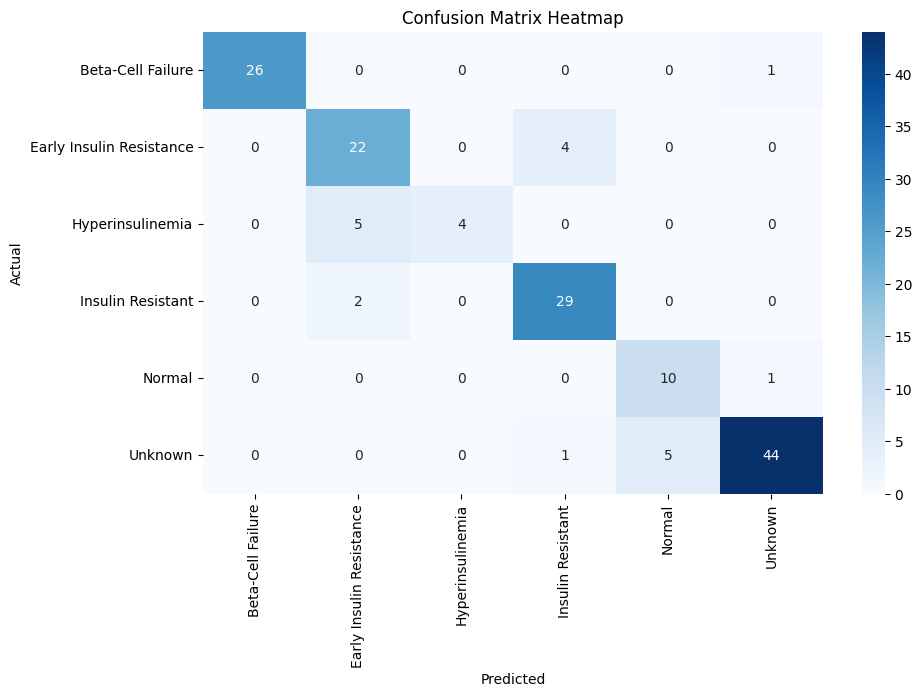

In [157]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_train))

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt="d",
            xticklabels=np.unique(y_train),
            yticklabels=np.unique(y_train),
            cmap="Blues")

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, class_weight="balanced")

param_grid = {
    "n_estimators": [200, 300, 500],
    "max_depth": [None, 5, 8, 12],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(
    rf,
    param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}


In [159]:
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))


                          precision    recall  f1-score   support

       Beta-Cell Failure       1.00      1.00      1.00        27
Early Insulin Resistance       1.00      1.00      1.00        26
        Hyperinsulinemia       1.00      1.00      1.00         9
       Insulin Resistant       1.00      1.00      1.00        31
                  Normal       0.85      1.00      0.92        11
                 Unknown       1.00      0.96      0.98        50

                accuracy                           0.99       154
               macro avg       0.97      0.99      0.98       154
            weighted avg       0.99      0.99      0.99       154



In [160]:
import joblib

joblib.dump(best_model, "metabolic_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [166]:
from sklearn.metrics import accuracy_score
from reportlab.platypus import SimpleDocTemplate, Paragraph
from reportlab.lib.styles import getSampleStyleSheet

# 1. Compute accuracy
accuracy = accuracy_score(y_test, y_pred_best)

# 2. Build PDF report
doc = SimpleDocTemplate("Model_Report.pdf")
styles = getSampleStyleSheet()
story = []

story.append(Paragraph("Metabolic Status Classification Report", styles['Title']))
story.append(Paragraph(f"Accuracy: {accuracy:.4f}", styles['BodyText']))
story.append(Paragraph("Best Hyperparameters:", styles['Heading2']))
story.append(Paragraph(str(grid.best_params_), styles['BodyText']))

doc.build(story)


In [162]:
!pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.5 MB/s eta 0:00:00


   feature  importance
0  Glucose    0.353597
4  HOMA_IR    0.221647
5      GIR    0.203964
1  Insulin    0.193004
3      Age    0.016116
2      BMI    0.011673


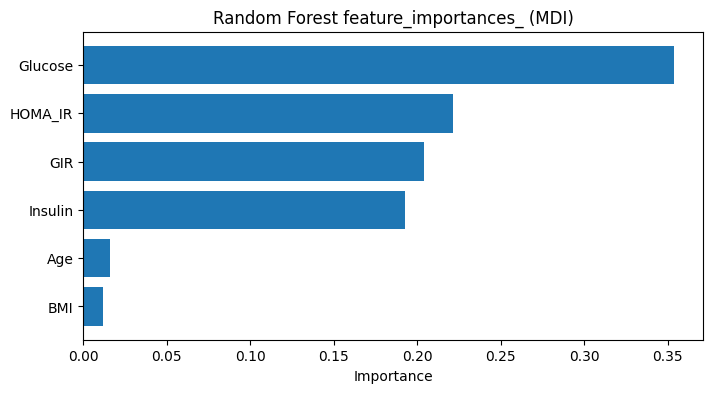

   feature  perm_mean  perm_std
0  Glucose   0.398918  0.029218
5      GIR   0.172727  0.019307
4  HOMA_IR   0.144805  0.025928
1  Insulin   0.143939  0.018901
3      Age   0.000000  0.000000
2      BMI   0.000000  0.000000


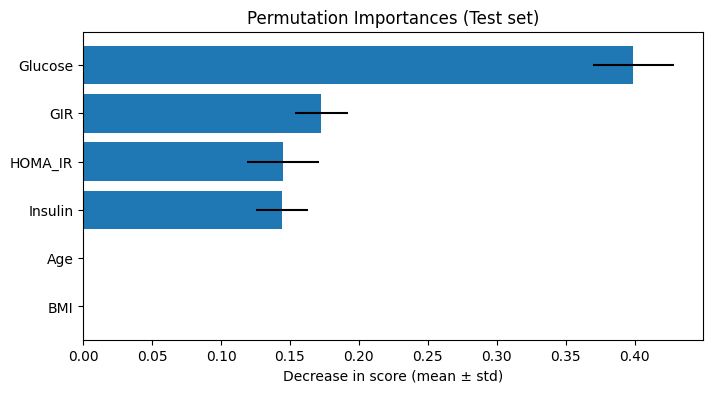

In [167]:
# assume: X_train, X_test, y_train, y_test already defined
# and you have a trained random forest `rf` (or grid.best_estimator_)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

features = ["Glucose", "Insulin", "BMI", "Age", "HOMA_IR", "GIR"]

# 1) If you haven't trained RF yet:
rf = RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced")
rf.fit(X_train[features], y_train)

# 2) Built-in importances (mean decrease impurity)
imp = pd.DataFrame({
    "feature": features,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

print(imp)

# Plot MDI importances
plt.figure(figsize=(8,4))
plt.barh(imp["feature"], imp["importance"])
plt.gca().invert_yaxis()
plt.title("Random Forest feature_importances_ (MDI)")
plt.xlabel("Importance")
plt.show()

# 3) Permutation importance (more reliable & model-agnostic)
perm = permutation_importance(rf, X_test[features], y_test, n_repeats=30, random_state=42, n_jobs=-1)
perm_imp_df = pd.DataFrame({
    "feature": features,
    "perm_mean": perm.importances_mean,
    "perm_std": perm.importances_std
}).sort_values("perm_mean", ascending=False)

print(perm_imp_df)

# Plot permutation importances with error bars
plt.figure(figsize=(8,4))
plt.barh(perm_imp_df["feature"], perm_imp_df["perm_mean"], xerr=perm_imp_df["perm_std"])
plt.gca().invert_yaxis()
plt.title("Permutation Importances (Test set)")
plt.xlabel("Decrease in score (mean ± std)")
plt.show()


**Feature importance analysis showed that glycemic markers overwhelmingly dominate metabolic-status prediction. Glucose alone accounted for ~40% of predictive power, while composite indices such as GIR (Glucose/Insulin ratio) and HOMA-IR contributed ~15–20% each. Raw insulin was similarly important. Anthropometric markers such as Age and BMI contributed effectively zero importance, suggesting that glucose–insulin dynamics fully explain variance in this dataset. These results are consistent with clinical physiology, where insulin resistance and β-cell function are determined primarily by glucose/insulin interactions rather than BMI.**